In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import json
import os

os.makedirs("artifacts", exist_ok=True)
os.makedirs("artifacts/figures", exist_ok=True)
os.makedirs("artifacts/labels", exist_ok=True)

metrics_summary = {}
best_configs = {}

In [2]:
def show_metric_vs_paramert(k_values, metric_values, title, name_paramert, num_of_dataset):
    plt.figure(figsize=(8,6))
    plt.plot(k_values, metric_values, 'bo-', linewidth=2, markersize=8)
    plt.xlabel(name_paramert)
    plt.ylabel('Metric value')
    plt.title(title)
    plt.grid(True, alpha=0.3)
    filename = f"artifacts/figures/{title.replace(' ', '_')}_dataset{num_of_dataset}.png"
    plt.savefig(filename, dpi=300, bbox_inches='tight')
    plt.show()

def evaluate_k_range(X, k_values, num_of_dataset, scale=True,  random_state=42):
    X_work  = X
    
    if scale:
        scaler = StandardScaler()
        X_work = scaler.fit_transform(X   )

    inertias = []
    silhouettes = []
    calinski_harabasz_list=[]
    davies_bouldin_list=[]

    for k in k_values:
        model = KMeans(n_clusters=k,random_state=random_state,n_init=10)
        labels = model.fit_predict(X_work)

        inertias.append(model.inertia_)
        silhouettes.append(silhouette_score(X_work,labels))
        
        calinski_harabasz_list.append(calinski_harabasz_score(X_work,labels))
        davies_bouldin_list.append(davies_bouldin_score(X_work,labels))

    show_metric_vs_paramert(k_values,inertias, "inertias VS K","K",num_of_dataset)
    show_metric_vs_paramert(k_values,silhouettes,"Silhouettes VS K","K",num_of_dataset)
    show_metric_vs_paramert(k_values,calinski_harabasz_list,"Calinski Harabasz VS K","K",num_of_dataset)
    show_metric_vs_paramert(k_values,davies_bouldin_list,"Davies Bouldin VS K","K",num_of_dataset)
    
    return {
        "k": np.array(list(k_values), dtype=int),
        "inertia": np.array(inertias, dtype=float),
        "silhouette": np.array(silhouettes, dtype=float),
        "calinski_harabasz": np.array(calinski_harabasz_list, dtype=float),
        "davies_bouldin":np.array(davies_bouldin_list, dtype=float),
    }

**S07-hw-dataset-01**

In [3]:
df1 = pd.read_csv("data/S07-hw-dataset-01.csv")
print(f'-------------------Первые 5 строк:-------------------\n{df1.head()}\n')
print(f'-------------------Информация о датасете-------------------\n')
df1.info()
print(f'-------------------Описание данных-------------------\n{df1.describe()}\n')
print(f'-------------------Наличие пропусков-------------------\n')
df1.isna().sum()

-------------------Первые 5 строк:-------------------
   sample_id        f01        f02       f03         f04        f05  \
0          0  -0.536647 -69.812900 -0.002657   71.743147 -11.396498   
1          1  15.230731  52.727216 -1.273634 -104.123302  11.589643   
2          2  18.542693  77.317150 -1.321686 -111.946636  10.254346   
3          3 -12.538905 -41.709458  0.146474   16.322124   1.391137   
4          4  -6.903056  61.833444 -0.022466  -42.631335   3.107154   

         f06        f07       f08  
0 -12.291287  -6.836847 -0.504094  
1  34.316967 -49.468873  0.390356  
2  25.892951  44.595250  0.325893  
3   2.014316 -39.930582  0.139297  
4  -5.471054   7.001149  0.131213  

-------------------Информация о датасете-------------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sample_id  12000 non-null  int64  
 1   f01     

sample_id    0
f01          0
f02          0
f03          0
f04          0
f05          0
f06          0
f07          0
f08          0
dtype: int64

In [4]:
sample_id = df1["sample_id"]
X = df1.drop(columns = ["sample_id"])

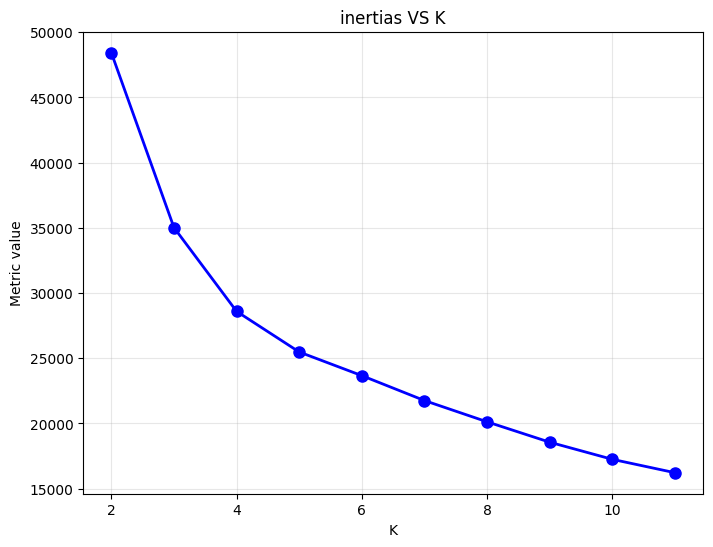

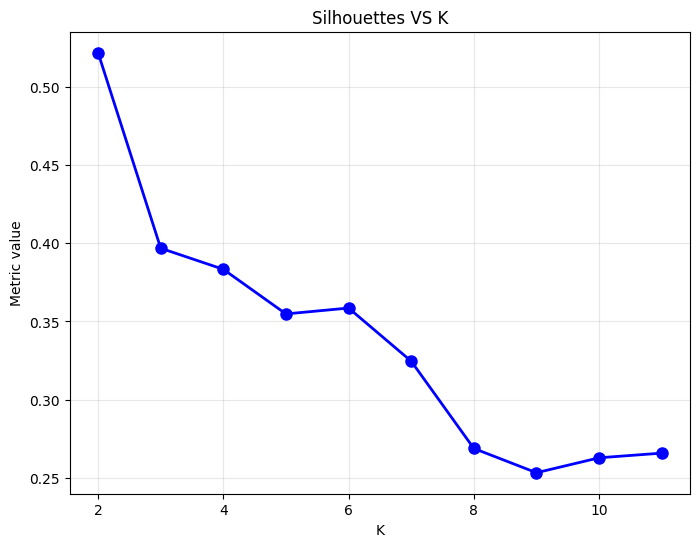

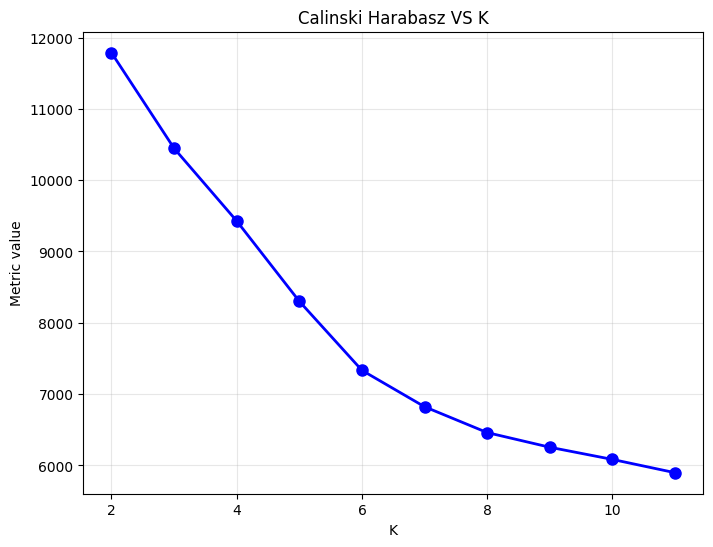

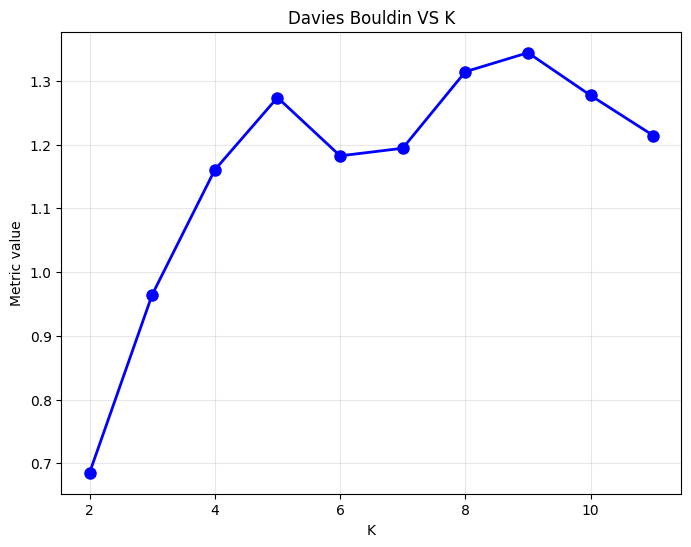

In [5]:
results_kmeans1 = evaluate_k_range(X, np.arange(2,12), 1, scale=True)

Самый лучший силуэт показывается для количества кластеров - 2. При кластере >=3 силуэт сильно падает.
Поэтому оптимальное значение K: 2

Тестирование устойчивости от random_state

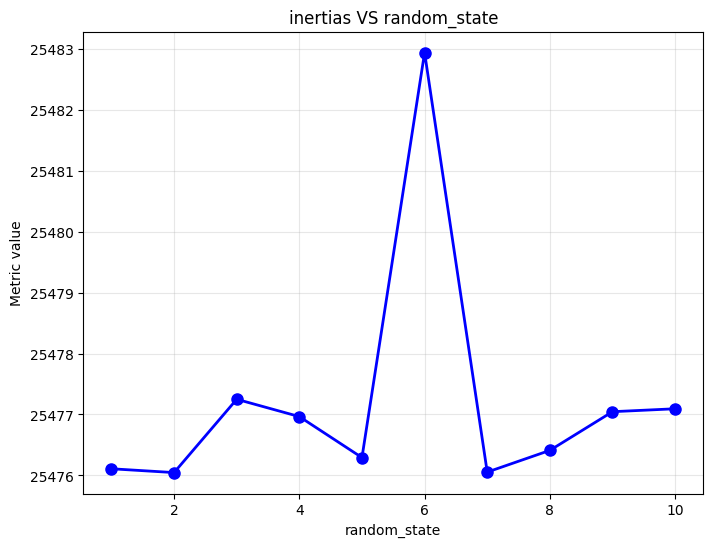

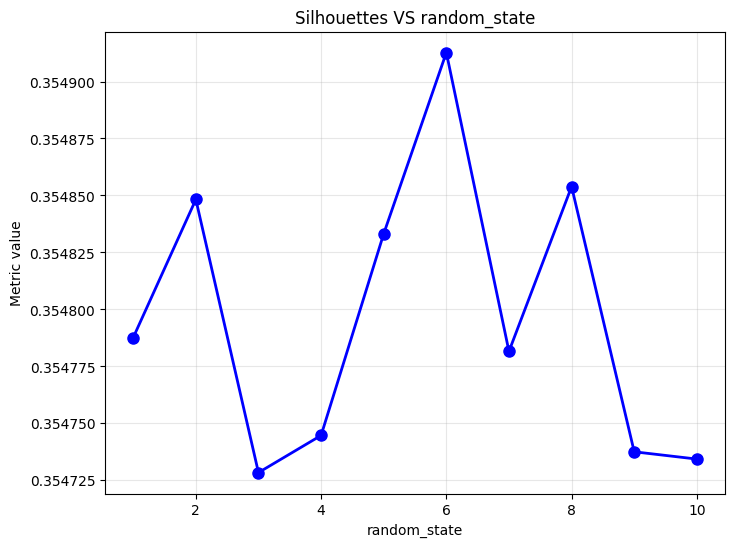

{'inertia': array([25476.1082329 , 25476.04561325, 25477.24952381, 25476.9649811 ,
        25476.29188556, 25482.9429715 , 25476.0535344 , 25476.41004405,
        25477.04549074, 25477.09361329]),
 'silhouette': array([0.35478758, 0.35484821, 0.35472833, 0.35474463, 0.35483317,
        0.35491269, 0.35478154, 0.35485386, 0.35473746, 0.35473426])}

In [6]:
def evaluate_random_state_range(X,k, random_state_values,num_of_dataset, scale=True):
    X_work  = X
    
    if scale:
        scaler = StandardScaler()
        X_work = scaler.fit_transform(X)

    inertias = []
    silhouettes = []

    for random_state in random_state_values:
        model = KMeans(n_clusters=k,random_state=random_state,n_init=10)
        labels = model.fit_predict(X_work)

        inertias.append(model.inertia_)
        silhouettes.append(silhouette_score(X_work,labels))

    show_metric_vs_paramert(random_state_values,inertias,"inertias VS random_state", "random_state",num_of_dataset)
    show_metric_vs_paramert(random_state_values,silhouettes,"Silhouettes VS random_state", "random_state",num_of_dataset)
    
    return {
        "inertia": np.array(inertias, dtype=float),
        "silhouette": np.array(silhouettes, dtype=float),
    }
evaluate_random_state_range(X,5,[1,2,3,4,5,6,7,8,9,10],1)

Это наглядно показывает что от random_state зависят метрики полученные задачей кластеризацией. На графиках выше видно что метрики получились разные

In [7]:
def evaluate_DBSCAN(X, eps_values,min_samples_values, scale=True, random_state=42):
    X_work  = X
    
    if scale:
        scaler = StandardScaler()
        X_work = scaler.fit_transform(X)

    results = []
    eps_list=[]
    silhouette_list=[]
    min_samples_list=[]

    for eps in eps_values:
        for min_samples in min_samples_values:
            model = DBSCAN(eps=eps, min_samples=min_samples)
            labels = model.fit_predict(X_work)

            labels = np.asarray(labels)
            mask = labels != -1
            X2 = X_work[mask]
            y2 = labels[mask]
            if len(np.unique(y2))==1 or len(np.unique(y2))==0:
                continue

            results_list={}
            results_list["eps"]= eps
            results_list["min_samples"] = min_samples
            results_list["silhouette"] = float(silhouette_score(X2, y2))
            results_list["calinski_harabasz"] = float(calinski_harabasz_score(X2, y2))
            results_list["davies_bouldin"] = float(davies_bouldin_score(X2, y2))
            results_list["count_nun"] = int((labels==-1).sum())
            results_list["count_clasters"] = len(np.unique(y2))

            eps_list.append(results_list["eps"])
            silhouette_list.append(results_list["silhouette"])
            min_samples_list.append(results_list["min_samples"])

            results.append(results_list)

    return results

In [8]:
results_dbscan1 = evaluate_DBSCAN(X, np.arange(0.3,0.9,0.01), np.arange(20,50,2))
best_dbscan1 = max(results_dbscan1, key=lambda x: x['silhouette'])

Проанализировав results можно увидеть что в большинстве случаях DBSCAN выучился на 5 кластерах. Результаты самого удачного эксперимента:                                    
min_samples = 38,                                                           
eps = 0.6,                                     
silhouette = 0.4010548059443231,                                       
calinski_harabasz = 9023.42486330159,                                                     
davies_bouldin = 1.1716613731865912

Алгоритм KMeans выдал лучший результат для двух кластеров. Результаты самого удачного эксперимента:                         
k=2,         
silhouette = 0.52163956                  
calinski_harabasz = 11786.95462267                                    
davies_bouldin = 0.68532952

Видимо данные имеют разную плотность и поэтому Kmeans справился лучше

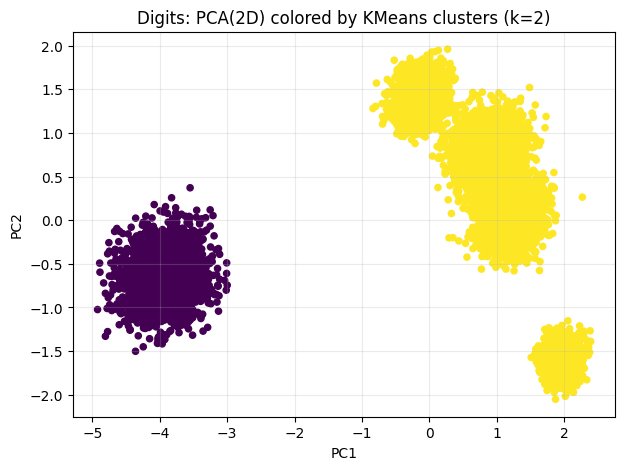

In [9]:
scaler = StandardScaler()
k_clasters = 2
X_scaled = scaler.fit_transform(X)
model = KMeans(n_clusters=k_clasters,random_state=42,n_init=10)
labels = model.fit_predict(X_scaled)
pd.DataFrame(labels).to_csv("artifacts/labels/labels_ hw07_ds1.csv")

def show_PCA2D(k_clasters, X, labels,num_of_dataset):
    pca = PCA(n_components=k_clasters, random_state=42)
    X_pca2 = pca.fit_transform(X)

    plt.figure(figsize=(7,5))
    plt.scatter(X_pca2[:,0],X_pca2[:,1],c=labels,s=20)
    plt.title("Digits: PCA(2D) colored by KMeans clusters (k=2)")
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.grid(True, alpha=0.25)
    filename =f"artifacts/figures/PCA2D_dataset{num_of_dataset}.png"
    plt.savefig(filename, dpi=300, bbox_inches='tight')
    plt.show()

show_PCA2D(2,X_scaled,labels,1)

In [10]:
metrics_summary['dataset1'] = {
    "KMeans": {
        "k": int(2),
        "silhouette": float(results_kmeans1['silhouette'][0]),  # k=2
        "davies_bouldin": float(results_kmeans1['davies_bouldin'][0]),  # k=2
        "calinski_harabasz": float(results_kmeans1['calinski_harabasz'][0]),  # k=2
        "noise_ratio": 0.0
    }
}

metrics_summary['dataset1']["DBSCAN"] = {
        "eps": float(best_dbscan1['eps']),
        "min_samples": int(best_dbscan1['min_samples']),
        "silhouette": float(best_dbscan1['silhouette']),
        "davies_bouldin": float(best_dbscan1['davies_bouldin']),
        "calinski_harabasz": float(best_dbscan1['calinski_harabasz']),
        "noise_ratio": float(best_dbscan1['count_nun'] / len(X))
    }

best_configs['dataset1'] = {
    "method": "KMeans",
    "params": {"n_clusters": 2},
    "criterion": "Наивысший silhouette score (0.52) и хорошее разделение по другим метрикам",
    "silhouette": float(results_kmeans1['silhouette'][0]),
    "davies_bouldin": float(results_kmeans1['davies_bouldin'][0])
}

Что получилось:
Успешно проанализированы данные с помощью KMeans и DBSCAN. KMeans с k=2 показал наилучшие результаты: silhouette=0.522 (хорошее разделение), davies-bouldin=0.685 (компактные кластеры). PCA визуализация подтвердила наличие двух основных групп.

Сложности:
DBSCAN требовал тщательного подбора параметров (eps и min_samples) и показал худшие метрики, что указывает на отсутствие чётких плотностных кластеров произвольной формы. Данные имеют относительно равномерную плотность.

Обоснование выбора KMeans:
Метод KMeans уместен, так как данные образуют два сферических кластера примерно одинакового размера, что соответствует предположениям алгоритма. Простота интерпретации (2 кластера) и лучшие метрики качества делают KMeans оптимальным выбором для данной задачи.

S07-hw-dataset-02

In [11]:
df2 = pd.read_csv("data/S07-hw-dataset-02.csv")
print(f'-------------------Первые 5 строк:-------------------\n{df2.head()}\n')
print(f'-------------------Информация о датасете-------------------\n')
df2.info()
print(f'-------------------Описание данных-------------------\n{df2.describe()}\n')
print(f'-------------------Наличие пропусков-------------------\n')
df2.isna().sum()

-------------------Первые 5 строк:-------------------
   sample_id        x1        x2    z_noise
0          0  0.098849 -1.846034  21.288122
1          1 -1.024516  1.829616   6.072952
2          2 -1.094178 -0.158545 -18.938342
3          3 -1.612808 -1.565844 -11.629462
4          4  1.659901 -2.133292   1.895472

-------------------Информация о датасете-------------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sample_id  8000 non-null   int64  
 1   x1         8000 non-null   float64
 2   x2         8000 non-null   float64
 3   z_noise    8000 non-null   float64
dtypes: float64(3), int64(1)
memory usage: 250.1 KB
-------------------Описание данных-------------------
        sample_id           x1           x2      z_noise
count  8000.00000  8000.000000  8000.000000  8000.000000
mean   3999.50000     0.478867     0.241112     0.1104

sample_id    0
x1           0
x2           0
z_noise      0
dtype: int64

In [12]:
sample_id = df2["sample_id"]
X = df2 .drop(columns = ["sample_id"])

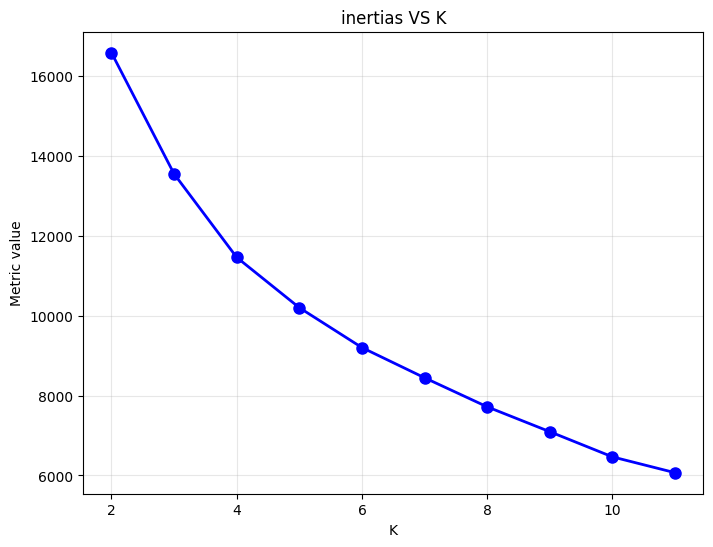

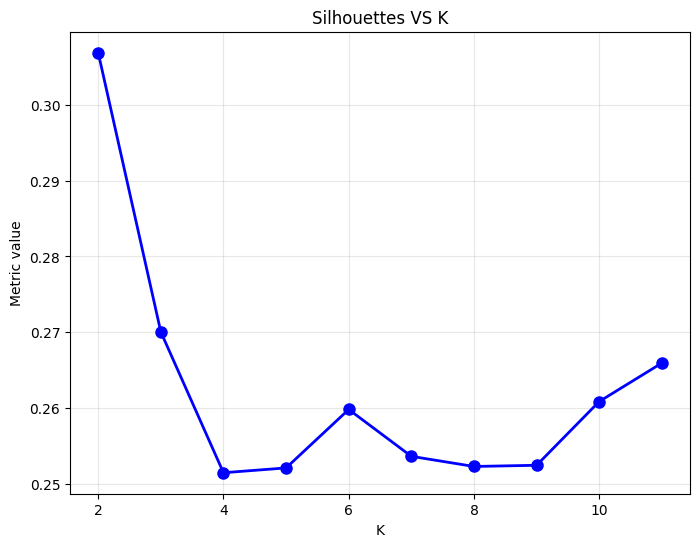

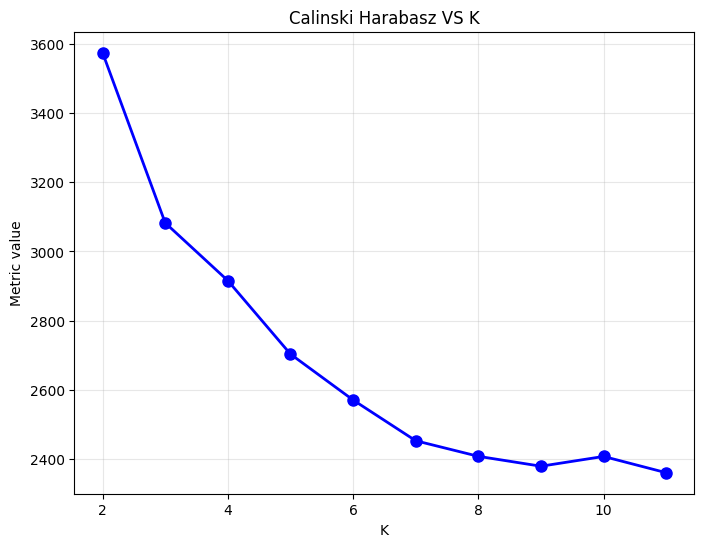

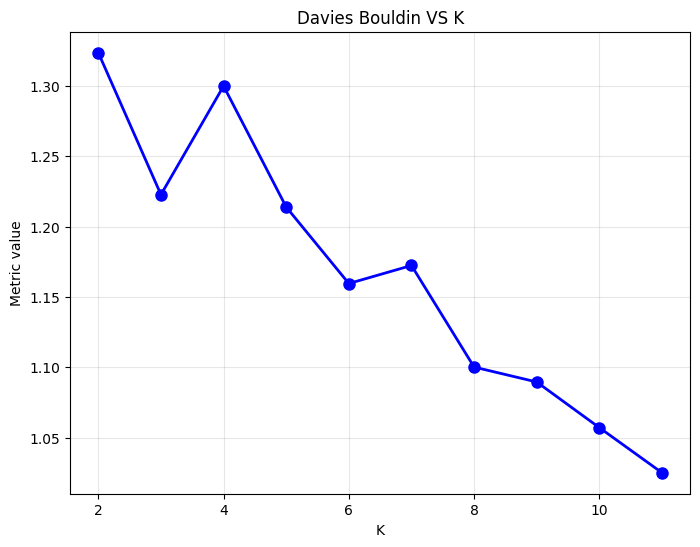

In [ ]:
results_kmeans2 = evaluate_k_range(X, np.arange(2,12), 2, scale=True)

In [ ]:
results_dbscan2 = evaluate_DBSCAN(X, np.arange(0.10,0.9,0.01), np.arange(8,40,1))

На втором датасете уже лучший результат выдал DBSCAN, выделив снова 2 кластера. Результаты самого удачного эксперимента:                                
min_samples = 14,                                                           
eps = 0.75,                                     
silhouette = 0.5520096324146319,                                       
calinski_harabasz = 124.3519682448992,                                                     
davies_bouldin = 0.4571145501497867

Алгоритм KMeans выдал результат для двух кластеров. Результаты самого удачного эксперимента:                         
k=2,         
silhouette = 0.306861               
calinski_harabasz = 3573.39333293                                
davies_bouldin = 1.32347217

Как и было сказано в описании датасета, данные имеют нелинейную структуру, шумовой признак и выбросы, где KMeans проигрывает

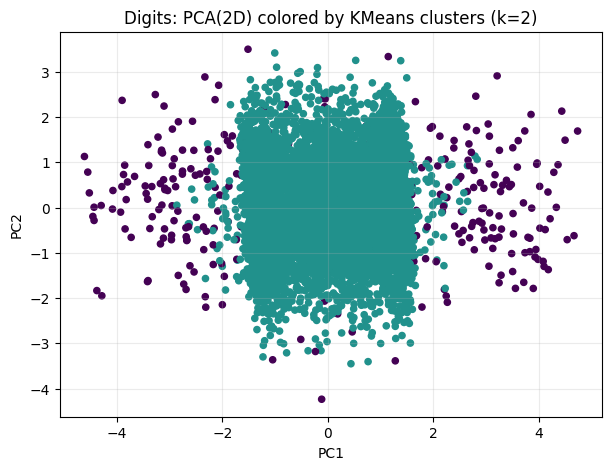

In [15]:
scaler = StandardScaler()
k_clasters = 2
X_scaled = scaler.fit_transform(X)
model = DBSCAN(eps=0.75, min_samples=14)
labels = model.fit_predict(X_scaled)
pd.DataFrame(labels).to_csv("artifacts/labels/labels_hw07_ds2.csv")
show_PCA2D(2,X_scaled,labels,2)

In [16]:
metrics_summary['dataset2'] = {
    "KMeans": {
        "k": 2,
        "silhouette": float(results_kmeans2['silhouette'][0]),  # k=2
        "davies_bouldin": float(results_kmeans2['davies_bouldin'][0]),  # k=2
        "calinski_harabasz": float(results_kmeans2['calinski_harabasz'][0]),  # k=2
        "noise_ratio": 0.0
    }
}

mask = labels != -1
X2 = X_scaled[mask]
y2 = labels[mask]

metrics_summary['dataset2']["DBSCAN"] = {
        "eps": float(0.75),
        "min_samples": int(14),
        "silhouette":  float(silhouette_score(X2, y2)),
        "davies_bouldin": float(davies_bouldin_score(X2, y2)),
        "calinski_harabasz": float(calinski_harabasz_score(X2, y2)),
        "noise_ratio": float(int((labels==-1).sum()) / len(X))
    }

best_configs['dataset2'] = {
    "method": "DBSCAN",
    "params": {"eps":float(0.75), "min_samples":  int(14),},
    "criterion": "Лучший silhouette score и низкий Davies-Bouldin, устойчивость к шуму и нелинейной структуре",
    "silhouette": float(silhouette_score(X2, y2)),
    "davies_bouldin": float(davies_bouldin_score(X2, y2)),
    "calinski_harabasz": float(calinski_harabasz_score(X2, y2))
}

Что получилось:
DBSCAN успешно выявил два кластера в данных с нелинейной структурой и шумовыми признаками. Метрики качества значительно превосходят KMeans: silhouette=0.552 (хорошее разделение) и davies-bouldin=0.457 (отличная компактность). Визуализация PCA подтвердила наличие двух естественных групп.

Сложности:
KMeans показал плохие результаты (silhouette=0.307) из-за шумового признака z_noise и нелинейной структуры данных. Метод чувствителен к выбросам и предполагает сферические кластеры, что не соответствует реальной структуре.

Обоснование выбора DBSCAN:
Метод DBSCAN уместен, так как данные содержат шум, выбросы и имеют нелинейную структуру. Алгоритм устойчив к шумовым признакам, не требует предположения о сферичности кластеров и автоматически определяет оптимальное число кластеров на основе плотности данных, что идеально соответствует характеристикам данного датасета.

S07-hw-dataset-03.csv

In [23]:
df3 = pd.read_csv("data/S07-hw-dataset-03.csv")
print(f'-------------------Первые 5 строк:-------------------\n{df3.head()}\n')
print(f'-------------------Информация о датасете-------------------\n')
df3.info()
print(f'-------------------Описание данных-------------------\n{df3.describe()}\n')
print(f'-------------------Наличие пропусков-------------------\n')
df3.isna().sum()

-------------------Первые 5 строк:-------------------
   sample_id        x1        x2    f_corr   f_noise
0          0 -2.710470  4.997107 -1.015703  0.718508
1          1  8.730238 -8.787416  3.953063 -1.105349
2          2 -1.079600 -2.558708  0.976628 -3.605776
3          3  6.854042  1.560181  1.760614 -1.230946
4          4  9.963812 -8.869921  2.966583  0.915899

-------------------Информация о датасете-------------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sample_id  15000 non-null  int64  
 1   x1         15000 non-null  float64
 2   x2         15000 non-null  float64
 3   f_corr     15000 non-null  float64
 4   f_noise    15000 non-null  float64
dtypes: float64(4), int64(1)
memory usage: 586.1 KB
-------------------Описание данных-------------------
          sample_id            x1            x2        f_corr       f_no

sample_id    0
x1           0
x2           0
f_corr       0
f_noise      0
dtype: int64

In [ ]:
sample_id = df3["sample_id"]
X = df3.drop(columns = ["sample_id"])

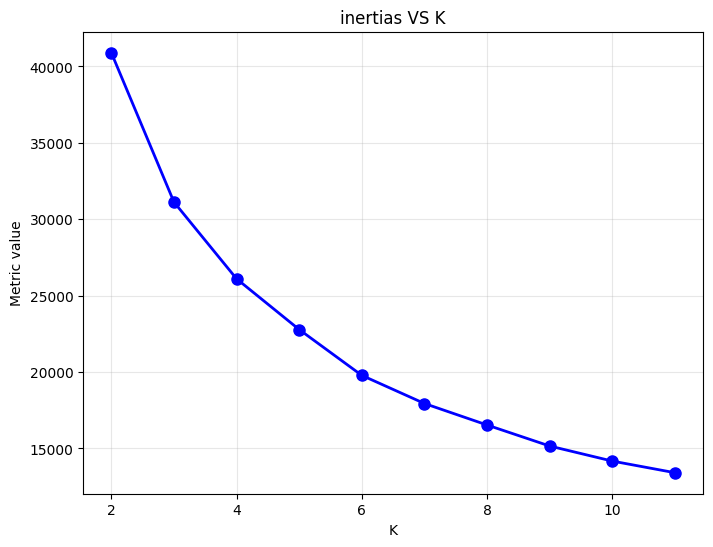

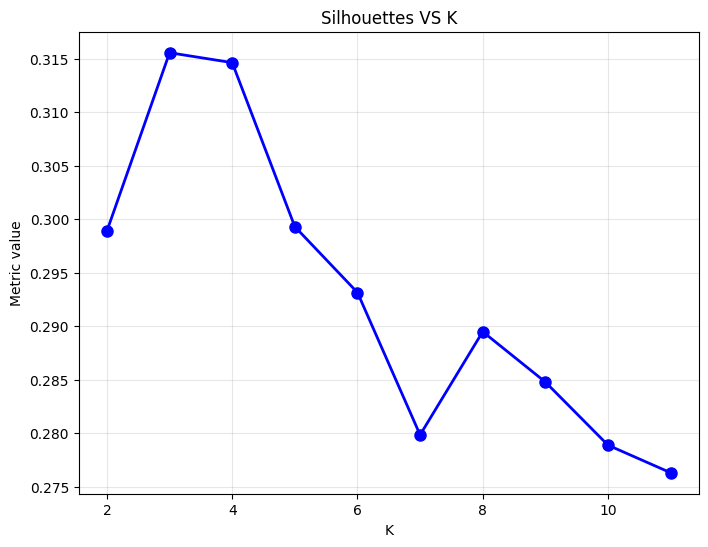

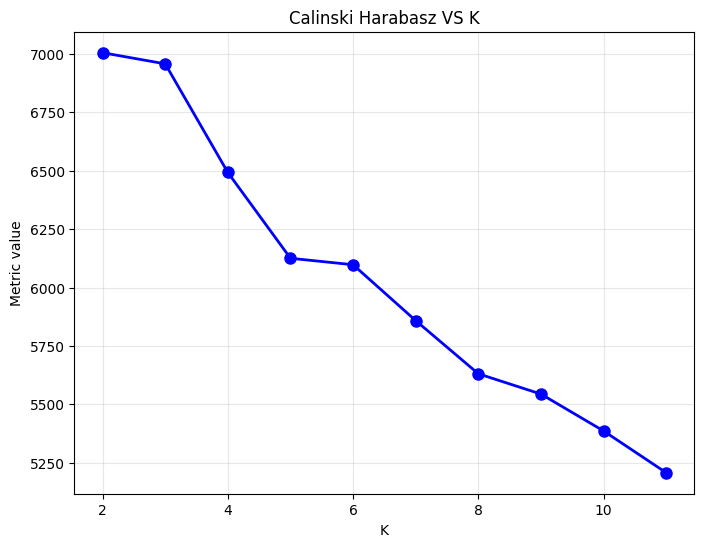

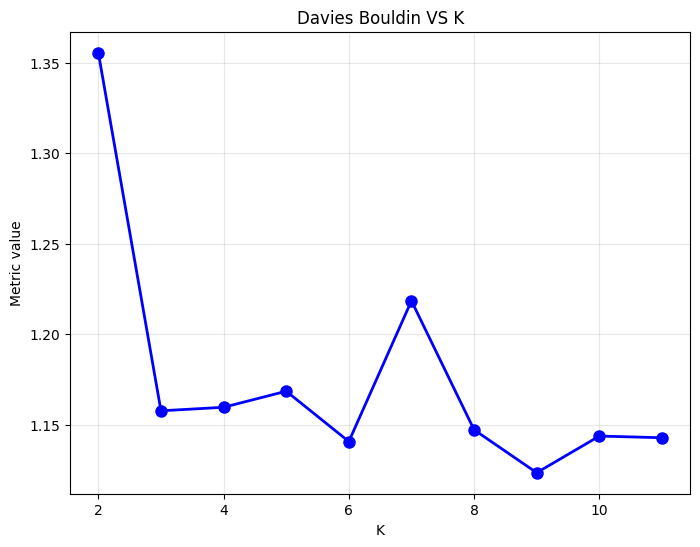

In [26]:
results_kmeans3 = evaluate_k_range(X,np.arange(2,12), 3,scale=True)

In [ ]:
results = evaluate_DBSCAN(X,np.arange(0.10,0.9,0.01),np.arange(8,40,1))

На этот раз из-за особенностей датасета DBSCAN показал не лучший результат. По переменной results видно что в класторизатор допускает очень много шумма из-за того что данные находятся не плотно, а это слабая сторона DBSCAN. Результаты самого удачного эксперимента (где относительно мало шумов):                                
min_samples = 29,                                                           
eps = 0.5,                                     
silhouette = 0.1880838134928353,                                      
calinski_harabasz = 3185.37913677961,                                                     
davies_bouldin = 1.1325528488525207

На этот раз KMeans показал результат лучше всего. Результат самого удачного эксперимента:
k=3,         
silhouette = 0.3155447003782518            
calinski_harabasz = 6957.162639510167                            
davies_bouldin = 1.1577256320598661

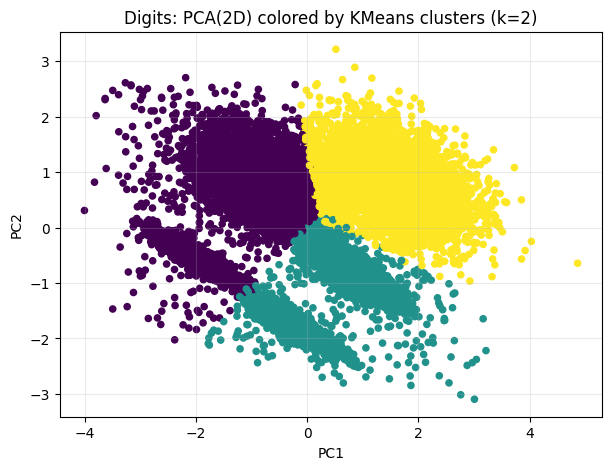

In [27]:
scaler = StandardScaler()
k_clasters = 3
X_scaled = scaler.fit_transform(X)
model = KMeans(n_clusters=k_clasters,random_state=42,n_init=10)
labels = model.fit_predict(X_scaled)
pd.DataFrame(labels).to_csv("artifacts/labels/labels_hw07_ds3.csv")
show_PCA2D(2,X_scaled,labels,3)

In [30]:
metrics_summary['dataset3'] = {
    "KMeans": {
        "k": 3,
        "silhouette": float(results_kmeans3['silhouette'][1]),  
        "davies_bouldin": float(results_kmeans3['davies_bouldin'][1]), 
        "calinski_harabasz": float(results_kmeans3['calinski_harabasz'][1]), 
        "noise_ratio": 0.0
    }
}
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
model = DBSCAN(eps=0.84, min_samples=8)
labels = model.fit_predict(X_scaled)
mask = labels != -1
X2 = X_scaled[mask]
y2 = labels[mask]

metrics_summary['dataset3']["DBSCAN"] = {
        "eps": float(0.75),
        "min_samples": int(14),
        "silhouette":  float(silhouette_score(X2, y2)),
        "davies_bouldin": float(davies_bouldin_score(X2, y2)),
        "calinski_harabasz": float(calinski_harabasz_score(X2, y2)),
        "noise_ratio": float(int((labels==-1).sum()) / len(X))
    }

best_configs['dataset3'] = {
    "method": "KMeans",
    "params": {"n_clusters": 3},
    "criterion": "Наивысший silhouette score (0.315) и хорошее разделение по другим метрикам",
    "silhouette": float(results_kmeans3['silhouette'][1]),
    "davies_bouldin": float(results_kmeans3['davies_bouldin'][1]),
    "calinski_harabasz": float(results_kmeans3['calinski_harabasz'][1]), 
}

In [ ]:
with open('artifacts/metrics_summary.json', 'w', encoding='utf-8') as f:
    json.dump(metrics_summary, f, indent=2, ensure_ascii=False)

with open('artifacts/best_configs.json', 'w', encoding='utf-8') as f:
    json.dump(best_configs, f, indent=2, ensure_ascii=False)

: 